In [522]:
import math
import numpy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from copy import deepcopy

In [663]:
# U(AB) = 20y
# U(BC) = 20
# U(CD) = 20y^2
# U(AD) = 50x(1-x)
# h = 0.2
# e = 0.01

In [664]:
def draw(A):
    for i in A:
        for j in i:
            print(j, end=" ")
        print()

In [665]:
def diff(A, B):
    max = 0
    for i in range(1, N-1):
        for j in range(1, N-1):
            if abs(A[i][j] - B[i][j]) > max:
                max = abs(A[i][j] - B[i][j])
                
    return max

In [735]:
def start():
    
    U = [[0 for i in range(N)] for k in range(N)]
    
    for i in range(N):
        U[0][i] = 30 * math.sin(math.pi * y_j(i)) #round(20 * y_j(i), 3)
    
    #for i in U:
    for i in range(N):
        U[i][-1] = 20 * x_i(i)
        #i[-1] = 20 * x_i(i)
        
    for i in range(N):
        U[-1][i] = round(20 * y_j(i), 3)
        
    for i in range(N):
        U[i][0] = round(30 * x_i(i) * (1 - x_i(i)), 3)
        
    return U

In [736]:
h = 0.2
l = 1
N = round(l / h) + 1
w = 1
e = 0.01

In [737]:
x_i = lambda i: i * h
y_j = lambda j: j * h

In [738]:
W = []
K = []
for w in np.arange(0.5, 2, 0.1):
    W.append(w)
    U = start()
    U_k = deepcopy(U)
    for i in range(1, N - 1):
        for j in range(1, N - 1):
            U[i][j] = U[i][j] + w * ( 0.25 * (U[i-1][j] + U[i+1][j] + U[i][j-1] + U[i][j+1]) - U[i][j] )
    k = 1
    while diff(U, U_k) > e:
        k += 1
        U_k = deepcopy(U)
        for i in range(1, N - 1):
            for j in range(1, N - 1):
                U[i][j] = U[i][j] + w * ( 0.25 * (U[i-1][j] + U[i+1][j] + U[i][j-1] + U[i][j+1]) - U[i][j] )

    K.append(k)

In [739]:
U = start()
U_k = deepcopy(U)
w = 1.3
for i in range(1, N - 1):
    for j in range(1, N - 1):
        U[i][j] = U[i][j] + w * ( 0.25 * (U[i-1][j] + U[i+1][j] + U[i][j-1] + U[i][j+1]) - U[i][j] )
k = 1
while diff(U, U_k) > e:
    k += 1
    U_k = deepcopy(U)
    for i in range(1, N - 1):
        for j in range(1, N - 1):
            U[i][j] = U[i][j] + w * ( 0.25 * (U[i-1][j] + U[i+1][j] + U[i][j-1] + U[i][j+1]) - U[i][j] )

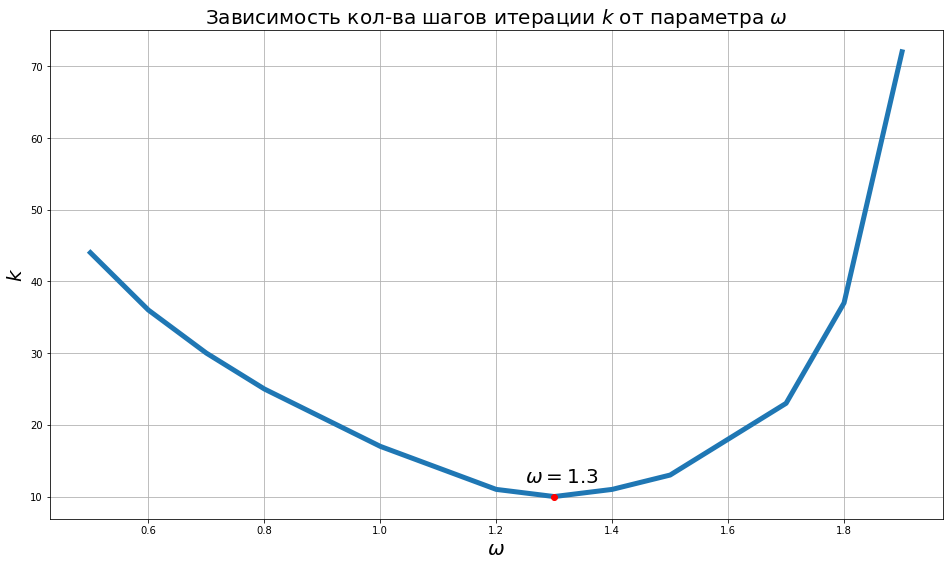

In [740]:
plt.figure(figsize=(16, 9))
plt.plot(W, K, linewidth=5)
plt.plot([1.3], [10], 'ro')
plt.text(1.25, 12, '$\omega=1.3$', fontsize=20)
plt.title('Зависимость кол-ва шагов итерации $k$ от параметра $\omega$', fontsize=20)
plt.xlabel('$\omega$', fontsize=20)
plt.ylabel('$k$', fontsize=20)
plt.grid()

Text(0.5, 0.98, 'Зависимость $U$ от $x$, $y$')

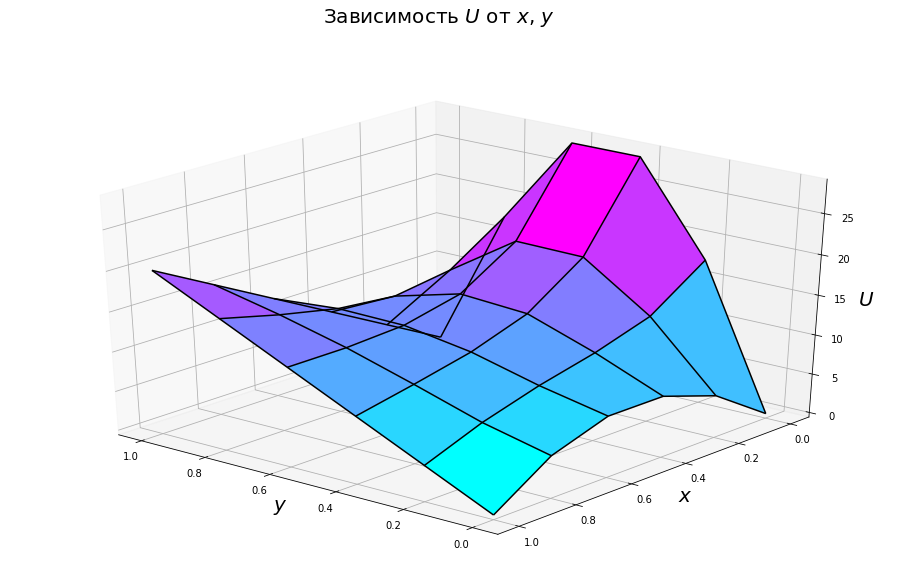

In [749]:
fig = plt.figure(figsize=(16, 9))
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(0, l + h/10, h)
X, Y = np.meshgrid(X, X)
U = np.array(U)

# Plot the surface.
ax.plot_surface(X, Y, np.array((U)), cmap='cool')
ax.plot_wireframe(X, Y, np.array((U)), color='black')

ax.set_xlabel("$y$", fontsize=20)
ax.set_ylabel("$x$", fontsize=20)
ax.set_zlabel("$U$", fontsize=20)
ax.view_init(30, 130)

fig.suptitle('Зависимость $U$ от $x$, $y$', fontsize=20)

In [750]:
A = np.array([W, K])

In [751]:
df = pd.DataFrame(A)

In [752]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9
1,44.0,36.0,30.0,25.0,21.0,17.0,14.0,11.0,10.0,11.0,13.0,18.0,23.0,37.0,72.0


In [753]:
df = pd.DataFrame(U)
df

,0,1,2,3,4,5
0,0.0,17.633558,28.531695,28.531695,17.633558,0.0
1,4.8,12.861877,18.368565,18.513517,13.024606,4.0
2,7.2,10.643138,13.565357,14.128627,11.951261,8.0
3,7.2,8.943411,11.121215,12.484788,12.652115,12.0
4,4.8,6.808824,9.491758,12.037243,14.172283,16.0
5,0.0,4.000000,8.000000,12.000000,16.000000,20.0
